In [1]:
from lib.unsupervised_learning import *
from lib.cross_validation_for_classification import *

In [2]:
bin_df = pd.read_csv('data/dataframes/df_after_cols_reduction.csv').iloc[:,1:]
pca_df = pd.read_csv('data/dataframes/pca_df.csv').iloc[:,1:]

print(f'Binary dataframe shape: {bin_df.shape}')
print(f'PCA dataframe shape: {pca_df.shape}')


Binary dataframe shape: (10070, 1795)
PCA dataframe shape: (10070, 26)


In [3]:
cat_cols = ['founded', 'business model','employees','product stage','status','fund_stage','suceeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in bin_df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in bin_df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in bin_df.columns if col.startswith("sector_")]
target_ind_list = [col  for col in bin_df.columns if col.startswith("industry_")]
technology_list = [col  for col in bin_df.columns if col.startswith("technology_")]

pca_cols = [col for col in pca_df.columns[2:] if col not in cat_cols and col not in num_cols]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [7]:
X_train, X_test, y_train, y_test = split_to_train_and_test(pca_df, 'suceeded', 0.2, 42, 'suceeded')
print(f'X_train shape: {X_train.shape}')
# print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')



X_train shape: (8056, 25)
y_train shape: (8056,)


In [10]:
X_train.columns
# sum_X_train = X_train['suceeded'].sum()
# sum_y_train = y_train.sum()
# print(f'X_train suceeded percentage: {sum_X_train/X_train.shape[0]}')
# print(f'y_train suceeded percentage: {sum_y_train/y_train.shape[0]}')

Index(['company_name', 'company_about', 'founded', 'business model',
       'employees', 'product stage', 'status', 'fund_stage', 'total_raised',
       'total_rounds', 'investors', 'ipo_price', 'geo_market_per',
       'tag_cols_x', 'tag_cols_y', 'targetmarket_cols_x',
       'targetmarket_cols_y', 'sector_list_x', 'sector_list_y',
       'target_ind_list_x', 'target_ind_list_y', 'technology_list_x',
       'technology_list_y', 'bin_cols_x', 'bin_cols_y'],
      dtype='object')

In [15]:
# X1 is the entire data without company name and about

X1 = bin_df.iloc[:,2:]
print(f'X1 shape: {X1.shape}')
df_scaled = scale_dataset(X1)

# X2 is the data without the binary columns

X2 = bin_df[cat_cols+num_cols]
print(f'X2 shape: {X2.shape}')
df_scaled2 = scale_dataset(X2)

# X3 is the PCA data 
X3 = pca_df[pca_cols]
print(f'X3 shape: {X3.shape}')
df_scaled3 = scale_dataset(X3)

X1 shape: (10070, 1793)
X2 shape: (10070, 12)
X3 shape: (10070, 12)


KMeans

In [17]:
# Perform kmeans on X1 - all columns

score, method, n = get_best_kmeans_values(df_scaled3, range(2,10), ['random','k-means++'] ,10, None)
score, method, n

(0.2896211648146273, 3, 'k-means++')

In [8]:
# Perform kmeans on X2 - no binary columns
# ~ 30 sec runtime

score, method, n = get_best_kmeans_values(df_scaled2, range(2,10), ['random','k-means++'] ,10, None)
score, method, n

(0.40936074501595177, 2, 'k-means++')

Hierarchical clustering

In [ ]:
# Perform hierarchical clustering on X1 - all columns

df_model, best_score, best_linkage, best_n = get_best_linkage_method(df_scaled, [3], ['ward', 'complete', 'average', 'single'])
best_score, best_linkage, best_n

In [18]:
# Perform hierarchical clustering on X2 - no binary columns
# ~ 2 min runtime

df2_model, best_score, best_linkage, best_n = get_best_linkage_method(df_scaled3, range(3,10), ['ward', 'complete', 'average', 'single'])
best_score, best_linkage, best_n

(0.3646292994404364, 'single', 3)

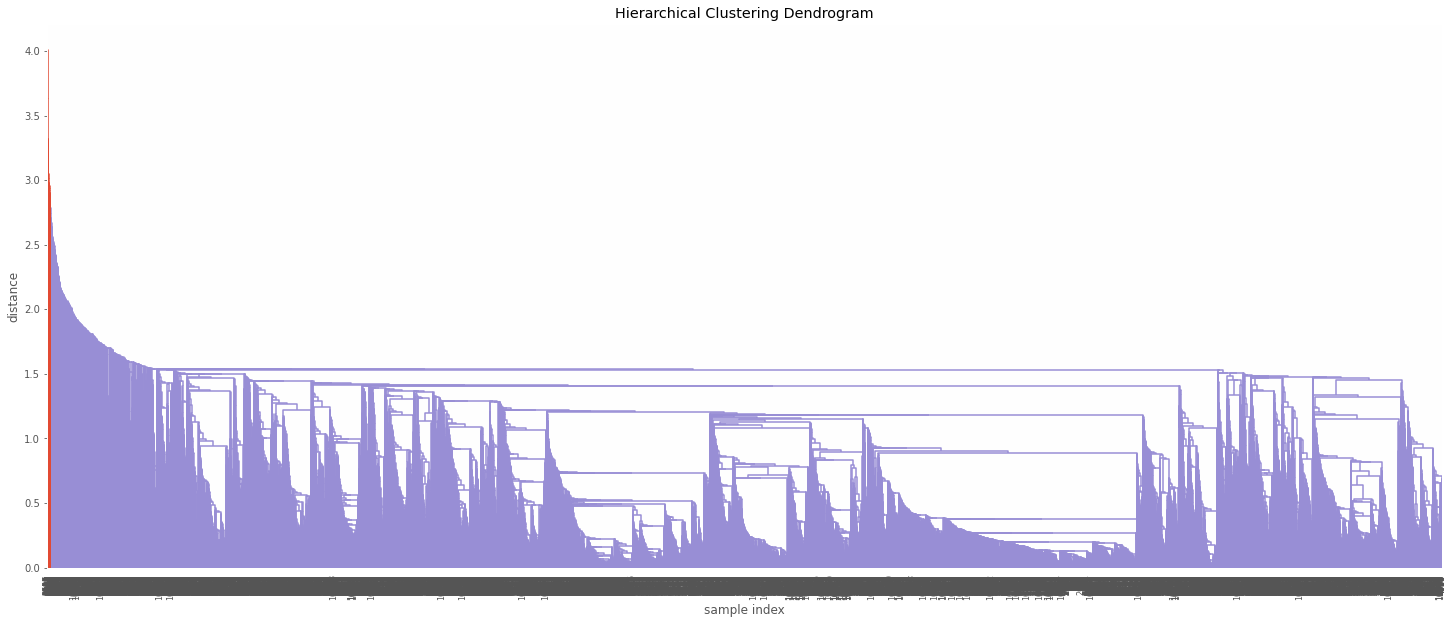

In [19]:
# Plotting dendrogram for best_linkage param
# ~ 4 min runtime

Z = linkage(df_scaled3, 'single') # generate the linkage array
# dendrogram plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.hlines(20, 0, 4000)
plt.show()

We can see the line cutting the 

DBScan

In [19]:
# Perform DBScan on X1 - all columns

score, best_eps, best_min = get_best_params_for_dbscan(df_scaled, [3],[5])
score, best_eps, best_min

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [21]:
# Perform DBScan on X2 - no binary columns

score, best_eps, best_min = get_best_params_for_dbscan(df_scaled3, [3,5,10,15],[3,4,5,6,7,8,9])
score, best_eps, best_min

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)